In [1]:
!unzip /content/hcaptcha_dataset.zip

Archive:  /content/hcaptcha_dataset.zip
   creating: hcaptcha_dataset/
   creating: hcaptcha_dataset/test/
   creating: hcaptcha_dataset/test/airplane/
  inflating: hcaptcha_dataset/test/airplane/1650246217769_16.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246227040_10.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246245663_10.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246563823_17.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246928370_14.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246937643_13.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246937643_17.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650246937643_9.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650247292989_14.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650247311539_4.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650247320820_15.jpg  
  inflating: hcaptcha_dataset/test/airplane/1650247320820_2.jpg  
  inflating: hcaptcha_dataset/test/airplane/165

In [2]:
# installing torch vision
#!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [3]:
import torch
import torch.nn as nn
#import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [
      # transforms.RandomCrop(32, padding = 4),
      # transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
     ]
     )

In [5]:
from collections import Counter
from torchvision import datasets 
import os
import cv2

In [6]:
train_dir = '/content/hcaptcha_dataset/train/'
test_dir = "/content/hcaptcha_dataset/test/"

In [7]:
traindata = datasets.ImageFolder(train_dir, transform=transform)
testdata = datasets.ImageFolder(test_dir, transform=transform)

In [8]:
traindata

Dataset ImageFolder
    Number of datapoints: 3018
    Root location: /content/hcaptcha_dataset/train/
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [9]:
f1=dict(Counter(traindata.targets))
f2=dict(Counter(testdata.targets))

In [10]:
f1

{0: 402, 1: 304, 2: 528, 3: 256, 4: 592, 5: 280, 6: 656}

In [11]:
cls=os.listdir("/content/hcaptcha_dataset/train")
print("The Labels are :")
for i in cls:
  print(i," ")

The Labels are :
motorbus  
seaplane  
motorcycle  
bicycle  
airplane  
truck  
boat  


In [12]:
#There are 7 classes.Here 0-aeroplane , 1-bicycle,2-boat,3-motorbus,4-motorcycle,5-seaplane,6-truck.
for key in range(len(cls)) :
  l=len(os.listdir("/content/hcaptcha_dataset/train/"+str(cls[key])))
  print("The number of ",cls[key],"in training data are ",l)

The number of  motorbus in training data are  256
The number of  seaplane in training data are  280
The number of  motorcycle in training data are  592
The number of  bicycle in training data are  304
The number of  airplane in training data are  402
The number of  truck in training data are  656
The number of  boat in training data are  528


In [13]:
print("The number of images in train data are " ,len(traindata))
print("The number of images in test data are " ,len(testdata))

The number of images in train data are  3018
The number of images in test data are  746


In [14]:
traindata.imgs

[('/content/hcaptcha_dataset/train/airplane/1650199961986_0.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_1.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_2.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_3.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_4.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_6.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_7.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_8.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199961986_9.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650199999123_5.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650200082948_5.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650200120107_10.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650200120107_15.jpg', 0),
 ('/content/hcaptcha_dataset/train/airplane/1650200157246_9.jpg', 0),
 ('/content/hcaptc

In [15]:
testdata.imgs

[('/content/hcaptcha_dataset/test/airplane/1650246217769_16.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246227040_10.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246245663_10.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246563823_17.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246928370_14.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246937643_13.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246937643_17.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650246937643_9.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650247292989_14.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650247311539_4.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650247320820_15.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650247320820_2.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650247320820_7.jpg', 0),
 ('/content/hcaptcha_dataset/test/airplane/1650247648230_7.jpg', 0),
 ('/content/hcaptcha_data

In [16]:
dataloders = torch.utils.data.DataLoader(traindata,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 num_workers=2) 
dataset_sizes =  len(traindata) 
dataloders

In [17]:
from google.colab.patches import cv2_imshow
from PIL import Image
import random
import cv2

In [18]:
sizes=[]
for i in range(len(traindata)):
  img_path=traindata.imgs[i][0]
  img=Image.open(img_path)
  shape=img.size
  sizes.append(shape)


In [19]:
set(sizes)

{(128, 128), (144, 144)}

In [20]:
traindata.imgs[1][0]

'/content/hcaptcha_dataset/train/airplane/1650199961986_1.jpg'

In [21]:
# def grayscale(p):
#   img = Image.open('p')
#   imgGray = img.convert('L')
#   return imgGray

In [58]:
def clean(traindata):
  imgs=[]
  labels=[]
  for i in range(len(traindata)):
    img_path=traindata.imgs[i][0]
    img=Image.open(img_path)
    imgGray = img.convert('L')
    image = imgGray.resize((128,128),Image.ANTIALIAS)
    x=np.array(image)
    #y=x.flatten()
    imgs.append(x)
    labels.append(traindata.imgs[i][1])
  norm_imgs=[]
  for i in imgs:
      norm= i/255
      norm_imgs.append(norm)
  #norm_imgs=np.array(norm_imgs).flatten()
  return norm_imgs,labels

In [22]:
import numpy as np
imgs=[]
labels=[]
for i in range(len(traindata)):
  img_path=traindata.imgs[i][0]
  img=Image.open(img_path)
  imgGray = img.convert('L')
  image = imgGray.resize((128,128),Image.ANTIALIAS)
  x=np.array(image)
  #y=x.flatten()
  imgs.append(x)
  labels.append(traindata.imgs[i][1])

In [23]:
print(traindata.class_to_idx)

{'airplane': 0, 'bicycle': 1, 'boat': 2, 'motorbus': 3, 'motorcycle': 4, 'seaplane': 5, 'truck': 6}


In [24]:
norm_imgs=[]
for i in imgs:
    norm= i/255
    norm_imgs.append(norm)
#norm_imgs=np.array(norm_imgs).flatten

In [31]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 2.7 MB/s 


In [32]:
import tensorflow_addons as tfa

In [33]:
micro = tfa.metrics.F1Score(num_classes=7, name="mic",average="micro")
macro = tfa.metrics.F1Score(num_classes=7, name="mic",average="micro")

In [34]:
d=dict()
l=[0,0,0,0,0,0,0]
for i in range(7):
  t=l.copy()
  t[i]=1
  d[i]=t
d

{0: [1, 0, 0, 0, 0, 0, 0],
 1: [0, 1, 0, 0, 0, 0, 0],
 2: [0, 0, 1, 0, 0, 0, 0],
 3: [0, 0, 0, 1, 0, 0, 0],
 4: [0, 0, 0, 0, 1, 0, 0],
 5: [0, 0, 0, 0, 0, 1, 0],
 6: [0, 0, 0, 0, 0, 0, 1]}

In [35]:
labels_=list(map(d.get, labels))

# A Baseline Neural network with given specifications

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_imgs, labels, test_size=0.05, random_state=0)

In [74]:
X_train.shape

TensorShape([2867, 128, 128])

In [45]:
norm_imgs

[array([[0.38431373, 0.38823529, 0.39215686, ..., 0.41176471, 0.41568627,
         0.41568627],
        [0.38431373, 0.38823529, 0.39215686, ..., 0.41176471, 0.41176471,
         0.41176471],
        [0.38823529, 0.39215686, 0.39215686, ..., 0.41176471, 0.41176471,
         0.41176471],
        ...,
        [0.56862745, 0.56078431, 0.39215686, ..., 0.3254902 , 0.31764706,
         0.31764706],
        [0.50196078, 0.48627451, 0.31372549, ..., 0.2627451 , 0.30196078,
         0.32941176],
        [0.51764706, 0.49803922, 0.32156863, ..., 0.24313725, 0.29019608,
         0.32156863]]),
 array([[0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
         0.99215686],
        [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
         0.99215686],
        [0.99215686, 0.99215686, 0.99215686, ..., 0.99607843, 0.99607843,
         0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
         0.99607843],
        [0.9

In [ ]:
labels_

In [27]:
import tensorflow as tf

In [129]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [47]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [48]:
# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(1024, activation="sigmoid"),
  tf.keras.layers.Dense(256, activation="sigmoid"),
  tf.keras.layers.Dense(64, activation="sigmoid"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])

In [49]:
# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [ ]:
#model_1.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

In [50]:
# Fit the model
norm_history = model_1.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 6s 226ms/step - loss: 1.8890 - accuracy: 0.2208 - val_loss: 1.7829 - val_accuracy: 0.1921
Epoch 2/10
23/23 [==============================] - 5s 211ms/step - loss: 1.6901 - accuracy: 0.3687 - val_loss: 1.5094 - val_accuracy: 0.4437
Epoch 3/10
23/23 [==============================] - 5s 207ms/step - loss: 1.4885 - accuracy: 0.4695 - val_loss: 1.3172 - val_accuracy: 0.5033
Epoch 4/10
23/23 [==============================] - 5s 212ms/step - loss: 1.3587 - accuracy: 0.5235 - val_loss: 1.1567 - val_accuracy: 0.6490
Epoch 5/10
23/23 [==============================] - 5s 226ms/step - loss: 1.2259 - accuracy: 0.5727 - val_loss: 1.0315 - val_accuracy: 0.7020
Epoch 6/10
23/23 [==============================] - 5s 210ms/step - loss: 1.1228 - accuracy: 0.5996 - val_loss: 0.9652 - val_accuracy: 0.6887
Epoch 7/10
23/23 [==============================] - 5s 214ms/step - loss: 1.0828 - accuracy: 0.6041 - val_loss: 0.9093 - val_accuracy: 0.6954
Epoch 

In [51]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              16778240  
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 7)                 455       
                                                                 
Total params: 17,057,543
Trainable params: 17,057,543
Non-trainable params: 0
_________________________________________________________________


In [52]:
_, accuracy = model_1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

90/90 [==============================] - 3s 34ms/step - loss: 0.9624 - accuracy: 0.6683
Accuracy: 66.83


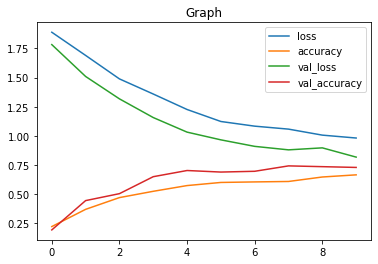

In [53]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Graph")

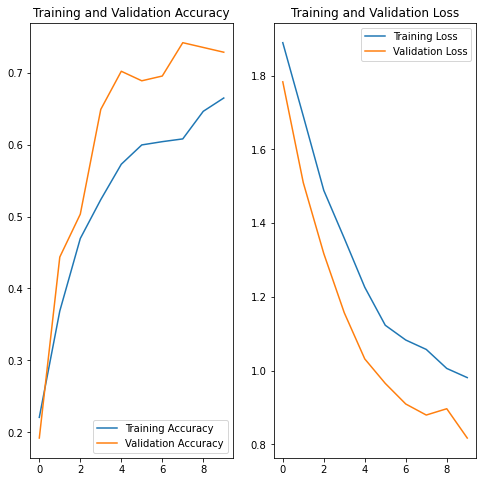

In [54]:
import matplotlib.pyplot as plt

acc = norm_history.history['accuracy']
val_acc = norm_history.history['val_accuracy']

loss = norm_history.history['loss']
val_loss = norm_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [139]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [220]:
y_p = model_1.predict(X_test)
y_p

array([[0.14126843, 0.56084824, 0.2638323 , ..., 0.01095316, 0.00208518,
        0.01286792],
       [0.18562002, 0.14946285, 0.6094911 , ..., 0.01011477, 0.00363242,
        0.02554499],
       [0.13860892, 0.02011793, 0.14208412, ..., 0.17066574, 0.11212738,
        0.28329208],
       ...,
       [0.13669077, 0.5637411 , 0.2688079 , ..., 0.00956779, 0.00184559,
        0.01188117],
       [0.13239244, 0.5908417 , 0.24638315, ..., 0.00992887, 0.00179967,
        0.01143415],
       [0.13355947, 0.01922388, 0.13347803, ..., 0.17662625, 0.11724739,
        0.28669932]], dtype=float32)

In [221]:
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [222]:
M1=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
M1.append(a)
M1.append(b)
M1.append(c)
M1

[0.37174187762423055, 0.543046357615894, 0.543046357615894]

In [153]:
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)

 Macro F1 Score: 0.37174187762423055
 Micro F1 Score: 0.543046357615894
 Accuracy Score: 0.543046357615894


# Experiment with number of layers and neurons per layer to increase the performance metrics.

one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) the number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [145]:
# Create the model with different number of layers 

# number of layers = 1

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(1024, activation="sigmoid"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
norm_history = model_2.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 7s 259ms/step - loss: 3.0433 - accuracy: 0.4147 - val_loss: 1.6672 - val_accuracy: 0.6358
Epoch 2/10
23/23 [==============================] - 5s 210ms/step - loss: 1.5750 - accuracy: 0.5682 - val_loss: 1.1528 - val_accuracy: 0.6689
Epoch 3/10
23/23 [==============================] - 5s 208ms/step - loss: 1.2114 - accuracy: 0.6345 - val_loss: 1.0205 - val_accuracy: 0.7152
Epoch 4/10
23/23 [==============================] - 5s 209ms/step - loss: 1.0894 - accuracy: 0.6631 - val_loss: 0.9359 - val_accuracy: 0.7086
Epoch 5/10
23/23 [==============================] - 5s 208ms/step - loss: 1.0191 - accuracy: 0.6833 - val_loss: 0.8832 - val_accuracy: 0.7550
Epoch 6/10
23/23 [==============================] - 6s 267ms/step - loss: 0.9527 - accuracy: 0.7129 - val_loss: 0.8094 - val_accuracy: 0.7748
Epoch 7/10
23/23 [==============================] - 8s 327ms/step - loss: 0.9051 - accuracy: 0.7238 - val_loss: 0.8079 - val_accuracy: 0.7815
Epoch 

In [146]:
_, accuracy = model_2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

90/90 [==============================] - 3s 36ms/step - loss: 0.7828 - accuracy: 0.7806
Accuracy: 78.06


In [224]:
y_p = model_2.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [225]:
M2=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M2.append(a)
M2.append(b)
M2.append(c)
M2

 Macro F1 Score: 0.7858473643511027
 Micro F1 Score: 0.8211920529801325
 Accuracy Score: 0.8211920529801324


[0.7858473643511027, 0.8211920529801325, 0.8211920529801324]

In [159]:
# Create the model with 2 layers 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(256, activation="sigmoid"),
  tf.keras.layers.Dense(64, activation="sigmoid"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history = model_3.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training


Epoch 1/10
23/23 [==============================] - 3s 91ms/step - loss: 1.8450 - accuracy: 0.2839 - val_loss: 1.7164 - val_accuracy: 0.4503
Epoch 2/10
23/23 [==============================] - 2s 68ms/step - loss: 1.6712 - accuracy: 0.4904 - val_loss: 1.5176 - val_accuracy: 0.5099
Epoch 3/10
23/23 [==============================] - 2s 68ms/step - loss: 1.5098 - accuracy: 0.5197 - val_loss: 1.3940 - val_accuracy: 0.6358
Epoch 4/10
23/23 [==============================] - 2s 68ms/step - loss: 1.3877 - accuracy: 0.5734 - val_loss: 1.2247 - val_accuracy: 0.6556
Epoch 5/10
23/23 [==============================] - 2s 67ms/step - loss: 1.2758 - accuracy: 0.5881 - val_loss: 1.1319 - val_accuracy: 0.6623
Epoch 6/10
23/23 [==============================] - 2s 70ms/step - loss: 1.1904 - accuracy: 0.6055 - val_loss: 1.0777 - val_accuracy: 0.6291
Epoch 7/10
23/23 [==============================] - 2s 70ms/step - loss: 1.1403 - accuracy: 0.6017 - val_loss: 0.9664 - val_accuracy: 0.6821
Epoch 8/10
23

In [162]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 16384)             0         
                                                                 
 dense_19 (Dense)            (None, 256)               4194560   
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 dense_21 (Dense)            (None, 7)                 455       
                                                                 
Total params: 4,211,463
Trainable params: 4,211,463
Non-trainable params: 0
_________________________________________________________________


In [226]:
y_p = model_3.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [227]:
M3=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M3.append(a)
M3.append(b)
M3.append(c)

 Macro F1 Score: 0.6656769066079314
 Micro F1 Score: 0.7814569536423841
 Accuracy Score: 0.7814569536423841


In [167]:
# Create the model with 5 layers 
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(8192, activation="sigmoid"),
  tf.keras.layers.Dense(4096, activation="sigmoid"),
  tf.keras.layers.Dense(1024, activation="sigmoid"),
  tf.keras.layers.Dense(256, activation="sigmoid"),
  tf.keras.layers.Dense(64, activation="sigmoid"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history = model_4.fit(X_train,
                                y_train,
                                epochs=5,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training


Epoch 1/5
23/23 [==============================] - 87s 4s/step - loss: 1.9109 - accuracy: 0.2075 - val_loss: 1.8992 - val_accuracy: 0.1921
Epoch 2/5
23/23 [==============================] - 79s 3s/step - loss: 1.8611 - accuracy: 0.2529 - val_loss: 1.8514 - val_accuracy: 0.2252
Epoch 3/5
23/23 [==============================] - 69s 3s/step - loss: 1.7270 - accuracy: 0.3307 - val_loss: 1.5519 - val_accuracy: 0.4702
Epoch 4/5
23/23 [==============================] - 64s 3s/step - loss: 1.5806 - accuracy: 0.3743 - val_loss: 1.4541 - val_accuracy: 0.3642
Epoch 5/5
23/23 [==============================] - 64s 3s/step - loss: 1.5484 - accuracy: 0.3722 - val_loss: 1.4075 - val_accuracy: 0.4503


In [168]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 16384)             0         
                                                                 
 dense_34 (Dense)            (None, 8192)              134225920 
                                                                 
 dense_35 (Dense)            (None, 4096)              33558528  
                                                                 
 dense_36 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_37 (Dense)            (None, 256)               262400    
                                                                 
 dense_38 (Dense)            (None, 64)                16448     
                                                                 
 dense_39 (Dense)            (None, 7)               

In [228]:
y_p = model_4.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [229]:
M4=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M4.append(a)
M4.append(b)
M4.append(c)

 Macro F1 Score: 0.2728203765363227
 Micro F1 Score: 0.4503311258278146
 Accuracy Score: 0.4503311258278146


In [171]:
# Create the model with 2 layers 
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(128, activation="sigmoid"),
  tf.keras.layers.Dense(128, activation="sigmoid"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history = model_5.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training


Epoch 1/10
23/23 [==============================] - 2s 54ms/step - loss: 1.8578 - accuracy: 0.3010 - val_loss: 1.7342 - val_accuracy: 0.2649
Epoch 2/10
23/23 [==============================] - 1s 46ms/step - loss: 1.7232 - accuracy: 0.3401 - val_loss: 1.6355 - val_accuracy: 0.4503
Epoch 3/10
23/23 [==============================] - 1s 46ms/step - loss: 1.6185 - accuracy: 0.4688 - val_loss: 1.5098 - val_accuracy: 0.5033
Epoch 4/10
23/23 [==============================] - 1s 47ms/step - loss: 1.5106 - accuracy: 0.5047 - val_loss: 1.3955 - val_accuracy: 0.5364
Epoch 5/10
23/23 [==============================] - 1s 45ms/step - loss: 1.4231 - accuracy: 0.5281 - val_loss: 1.2963 - val_accuracy: 0.5695
Epoch 6/10
23/23 [==============================] - 1s 44ms/step - loss: 1.3484 - accuracy: 0.5445 - val_loss: 1.2755 - val_accuracy: 0.6490
Epoch 7/10
23/23 [==============================] - 1s 44ms/step - loss: 1.2832 - accuracy: 0.5807 - val_loss: 1.1876 - val_accuracy: 0.5298
Epoch 8/10
23

In [172]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 16384)             0         
                                                                 
 dense_40 (Dense)            (None, 128)               2097280   
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dense_42 (Dense)            (None, 7)                 903       
                                                                 
Total params: 2,114,695
Trainable params: 2,114,695
Non-trainable params: 0
_________________________________________________________________


In [230]:
y_p = model_5.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [231]:
M5=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M5.append(a)
M5.append(b)
M5.append(c)

 Macro F1 Score: 0.4848381352786988
 Micro F1 Score: 0.6622516556291391
 Accuracy Score: 0.6622516556291391


In [175]:
# history = model_1.fit(
#     X_train,
#     y_train, 
#     epochs=10, 
#     steps_per_epoch=500,
#     validation_data=(X_test, y_test), 
#     validation_steps=2
# )

#  Experiment with activation functions

relu

In [177]:
# Create the model with different number of layers 

# number of layers = 1

model_6 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
norm_history = model_6.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 5s 218ms/step - loss: 20.2292 - accuracy: 0.2926 - val_loss: 2.8576 - val_accuracy: 0.5033
Epoch 2/10
23/23 [==============================] - 5s 233ms/step - loss: 1.8747 - accuracy: 0.5323 - val_loss: 1.1199 - val_accuracy: 0.6490
Epoch 3/10
23/23 [==============================] - 9s 393ms/step - loss: 1.0791 - accuracy: 0.6686 - val_loss: 0.6956 - val_accuracy: 0.7550
Epoch 4/10
23/23 [==============================] - 5s 220ms/step - loss: 0.8395 - accuracy: 0.7307 - val_loss: 0.7553 - val_accuracy: 0.7219
Epoch 5/10
23/23 [==============================] - 6s 251ms/step - loss: 0.7712 - accuracy: 0.7489 - val_loss: 0.6510 - val_accuracy: 0.7947
Epoch 6/10
23/23 [==============================] - 5s 237ms/step - loss: 0.7488 - accuracy: 0.7513 - val_loss: 0.6795 - val_accuracy: 0.7748
Epoch 7/10
23/23 [==============================] - 8s 367ms/step - loss: 0.7736 - accuracy: 0.7394 - val_loss: 0.7159 - val_accuracy: 0.7417
Epoch

In [179]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 16384)             0         
                                                                 
 dense_43 (Dense)            (None, 1024)              16778240  
                                                                 
 dense_44 (Dense)            (None, 7)                 7175      
                                                                 
Total params: 16,785,415
Trainable params: 16,785,415
Non-trainable params: 0
_________________________________________________________________


In [232]:
y_p = model_6.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [233]:
M6=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M6.append(a)
M6.append(b)
M6.append(c)

 Macro F1 Score: 0.7630598533463301
 Micro F1 Score: 0.7814569536423841
 Accuracy Score: 0.7814569536423841


softplus

In [182]:
# Create the model with different number of layers 

# number of layers = 1

model_7 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(1024, activation="softplus"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
norm_history = model_7.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 7s 276ms/step - loss: 29.8920 - accuracy: 0.2745 - val_loss: 1.6099 - val_accuracy: 0.3709
Epoch 2/10
23/23 [==============================] - 6s 262ms/step - loss: 1.3794 - accuracy: 0.4726 - val_loss: 1.0530 - val_accuracy: 0.6159
Epoch 3/10
23/23 [==============================] - 7s 287ms/step - loss: 1.1273 - accuracy: 0.6045 - val_loss: 0.9171 - val_accuracy: 0.6821
Epoch 4/10
23/23 [==============================] - 6s 252ms/step - loss: 1.0298 - accuracy: 0.6352 - val_loss: 0.8634 - val_accuracy: 0.7285
Epoch 5/10
23/23 [==============================] - 7s 306ms/step - loss: 0.9800 - accuracy: 0.6631 - val_loss: 0.8254 - val_accuracy: 0.6689
Epoch 6/10
23/23 [==============================] - 6s 269ms/step - loss: 0.9117 - accuracy: 0.6896 - val_loss: 0.7921 - val_accuracy: 0.7020
Epoch 7/10
23/23 [==============================] - 6s 243ms/step - loss: 0.8466 - accuracy: 0.7098 - val_loss: 0.7022 - val_accuracy: 0.7947
Epoch

In [234]:
y_p = model_7.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [235]:
M7=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M7.append(a)
M7.append(b)
M7.append(c)

 Macro F1 Score: 0.3931483387288903
 Micro F1 Score: 0.5298013245033113
 Accuracy Score: 0.5298013245033113


tanh

In [190]:
# Create the model with different number of layers 

# number of layers = 1

model_8 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.Dense(1024, activation="tanh"),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
norm_history = model_8.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 5s 218ms/step - loss: 4.8890 - accuracy: 0.2885 - val_loss: 1.9696 - val_accuracy: 0.3311
Epoch 2/10
23/23 [==============================] - 5s 234ms/step - loss: 1.6773 - accuracy: 0.3865 - val_loss: 1.3258 - val_accuracy: 0.5960
Epoch 3/10
23/23 [==============================] - 6s 244ms/step - loss: 1.3669 - accuracy: 0.5145 - val_loss: 1.1416 - val_accuracy: 0.6821
Epoch 4/10
23/23 [==============================] - 5s 209ms/step - loss: 1.2462 - accuracy: 0.5968 - val_loss: 1.0604 - val_accuracy: 0.7417
Epoch 5/10
23/23 [==============================] - 5s 211ms/step - loss: 1.1540 - accuracy: 0.6184 - val_loss: 0.9823 - val_accuracy: 0.6954
Epoch 6/10
23/23 [==============================] - 5s 208ms/step - loss: 1.0863 - accuracy: 0.6425 - val_loss: 0.9348 - val_accuracy: 0.6887
Epoch 7/10
23/23 [==============================] - 5s 214ms/step - loss: 1.0340 - accuracy: 0.6707 - val_loss: 0.8800 - val_accuracy: 0.7483
Epoch 

In [236]:
y_p = model_8.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [237]:
M8=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M8.append(a)
M8.append(b)
M8.append(c)

 Macro F1 Score: 0.622311237184683
 Micro F1 Score: 0.7086092715231789
 Accuracy Score: 0.7086092715231788


# regularization techniques: Early stopping, Dropout rate

Early Stopping

In [193]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [197]:
# Create the model with  layers 
model_9 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256, activation="sigmoid"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation="sigmoid"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history = model_9.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                callbacks= [callback]
                                ) #see how the model performs on the test set during training


Epoch 1/10
23/23 [==============================] - 5s 171ms/step - loss: 1.2501 - accuracy: 0.6020 - val_loss: 1.9231 - val_accuracy: 0.2583
Epoch 2/10
23/23 [==============================] - 3s 126ms/step - loss: 0.7303 - accuracy: 0.7764 - val_loss: 1.6655 - val_accuracy: 0.4503
Epoch 3/10
23/23 [==============================] - 3s 126ms/step - loss: 0.5827 - accuracy: 0.8172 - val_loss: 1.4680 - val_accuracy: 0.5298
Epoch 4/10
23/23 [==============================] - 3s 129ms/step - loss: 0.4921 - accuracy: 0.8570 - val_loss: 1.2995 - val_accuracy: 0.5762
Epoch 5/10
23/23 [==============================] - 3s 130ms/step - loss: 0.4086 - accuracy: 0.8720 - val_loss: 1.1109 - val_accuracy: 0.6689
Epoch 6/10
23/23 [==============================] - 3s 128ms/step - loss: 0.3769 - accuracy: 0.8845 - val_loss: 0.9844 - val_accuracy: 0.7219
Epoch 7/10
23/23 [==============================] - 5s 222ms/step - loss: 0.3110 - accuracy: 0.9069 - val_loss: 0.8345 - val_accuracy: 0.7616
Epoch 

In [238]:
y_p = model_9.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [239]:
M9=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M9.append(a)
M9.append(b)
M9.append(c)

 Macro F1 Score: 0.7806666240163777
 Micro F1 Score: 0.8410596026490065
 Accuracy Score: 0.8410596026490066


In [200]:
# Create the model with different number of layers 

# number of layers = 1

model_10 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1024, activation="sigmoid"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
norm_history = model_10.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                callbacks= [callback]
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 21s 840ms/step - loss: 3.1161 - accuracy: 0.5877 - val_loss: 1.6931 - val_accuracy: 0.3444
Epoch 2/10
23/23 [==============================] - 16s 690ms/step - loss: 1.0264 - accuracy: 0.7520 - val_loss: 1.6136 - val_accuracy: 0.3377
Epoch 3/10
23/23 [==============================] - 11s 489ms/step - loss: 0.6229 - accuracy: 0.8200 - val_loss: 1.2787 - val_accuracy: 0.4702
Epoch 4/10
23/23 [==============================] - 13s 565ms/step - loss: 0.4748 - accuracy: 0.8615 - val_loss: 1.1486 - val_accuracy: 0.5497
Epoch 5/10
23/23 [==============================] - 13s 556ms/step - loss: 0.3733 - accuracy: 0.8877 - val_loss: 0.8488 - val_accuracy: 0.6821
Epoch 6/10
23/23 [==============================] - 11s 491ms/step - loss: 0.3257 - accuracy: 0.9055 - val_loss: 0.7753 - val_accuracy: 0.7219
Epoch 7/10
23/23 [==============================] - 12s 524ms/step - loss: 0.2992 - accuracy: 0.9149 - val_loss: 0.6667 - val_accuracy: 0.7417

In [240]:
y_p = model_10.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [241]:
M10=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M10.append(a)
M10.append(b)
M10.append(c)

 Macro F1 Score: 0.7943587826394642
 Micro F1 Score: 0.8410596026490065
 Accuracy Score: 0.8410596026490066


DropOut Rate:
 

In [120]:
# dropout_rate=[0.1,0.2,0.3,0.4]
# A=[]

In [203]:
#Early Stooping and dropout


# Create the model with  layers 
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256, activation="sigmoid"),tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation="sigmoid"),tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history = model_11.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                callbacks= [callback]
                                ) #see how the model performs on the test set during training


Epoch 1/10
23/23 [==============================] - 4s 137ms/step - loss: 1.4333 - accuracy: 0.5298 - val_loss: 1.6069 - val_accuracy: 0.3974
Epoch 2/10
23/23 [==============================] - 3s 126ms/step - loss: 0.9541 - accuracy: 0.6739 - val_loss: 1.4207 - val_accuracy: 0.5828
Epoch 3/10
23/23 [==============================] - 3s 126ms/step - loss: 0.8130 - accuracy: 0.7422 - val_loss: 1.2197 - val_accuracy: 0.6556
Epoch 4/10
23/23 [==============================] - 3s 132ms/step - loss: 0.7581 - accuracy: 0.7489 - val_loss: 1.0442 - val_accuracy: 0.6623
Epoch 5/10
23/23 [==============================] - 3s 131ms/step - loss: 0.6820 - accuracy: 0.7722 - val_loss: 0.9258 - val_accuracy: 0.6887
Epoch 6/10
23/23 [==============================] - 3s 136ms/step - loss: 0.6443 - accuracy: 0.7862 - val_loss: 0.7035 - val_accuracy: 0.8278
Epoch 7/10
23/23 [==============================] - 3s 133ms/step - loss: 0.5865 - accuracy: 0.8036 - val_loss: 0.6352 - val_accuracy: 0.8344
Epoch 

In [242]:
y_p = model_11.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [243]:
M11=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M11.append(a)
M11.append(b)
M11.append(c)

 Macro F1 Score: 0.8333948117381069
 Micro F1 Score: 0.8741721854304636
 Accuracy Score: 0.8741721854304636


#  Optimizers 

Adam

In [206]:
# Create the model with different number of layers 

# number of layers = 1

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1024, activation="sigmoid"),tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit the model
norm_history = model_12.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                callbacks= [callback]
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 17s 662ms/step - loss: 2.4117 - accuracy: 0.6118 - val_loss: 1.7634 - val_accuracy: 0.4106
Epoch 2/10
23/23 [==============================] - 17s 753ms/step - loss: 0.9260 - accuracy: 0.7422 - val_loss: 1.5867 - val_accuracy: 0.4437
Epoch 3/10
23/23 [==============================] - 14s 583ms/step - loss: 0.6570 - accuracy: 0.7872 - val_loss: 1.2968 - val_accuracy: 0.4967
Epoch 4/10
23/23 [==============================] - 12s 514ms/step - loss: 0.5321 - accuracy: 0.8214 - val_loss: 0.9832 - val_accuracy: 0.6689
Epoch 5/10
23/23 [==============================] - 12s 513ms/step - loss: 0.4339 - accuracy: 0.8559 - val_loss: 0.8291 - val_accuracy: 0.7152
Epoch 6/10
23/23 [==============================] - 12s 514ms/step - loss: 0.3703 - accuracy: 0.8814 - val_loss: 0.7512 - val_accuracy: 0.7351
Epoch 7/10
23/23 [==============================] - 12s 509ms/step - loss: 0.3377 - accuracy: 0.8852 - val_loss: 0.6557 - val_accuracy: 0.7815

In [244]:
y_p = model_12.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [245]:
M12=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M12.append(a)
M12.append(b)
M12.append(c)

 Macro F1 Score: 0.803556765122326
 Micro F1 Score: 0.8410596026490065
 Accuracy Score: 0.8410596026490066


RMSProp

In [210]:
# Create the model with different number of layers 

# number of layers = 1

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128)), # input layer (we had to reshape 128x128 to , the Flatten layer does this for us)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1024, activation="sigmoid"),tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(7, activation="softmax"), # output shape is 10, activation is softmax
])
# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,name='RMSprop') ,
                 metrics=["accuracy"])
#Fit the model
norm_history = model_13.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test),
                                batch_size=128,
                                callbacks= [callback]
                                ) #see how the model performs on the test set during training

Epoch 1/10
23/23 [==============================] - 17s 621ms/step - loss: 2.0359 - accuracy: 0.6254 - val_loss: 2.5372 - val_accuracy: 0.2583
Epoch 2/10
23/23 [==============================] - 15s 628ms/step - loss: 0.8211 - accuracy: 0.7492 - val_loss: 2.3785 - val_accuracy: 0.2053
Epoch 3/10
23/23 [==============================] - 15s 660ms/step - loss: 0.6708 - accuracy: 0.7782 - val_loss: 1.9786 - val_accuracy: 0.2848
Epoch 4/10
23/23 [==============================] - 17s 723ms/step - loss: 0.5646 - accuracy: 0.7998 - val_loss: 1.6445 - val_accuracy: 0.4172
Epoch 5/10
23/23 [==============================] - 14s 609ms/step - loss: 0.4841 - accuracy: 0.8361 - val_loss: 0.9121 - val_accuracy: 0.6623
Epoch 6/10
23/23 [==============================] - 12s 541ms/step - loss: 0.4569 - accuracy: 0.8451 - val_loss: 0.7586 - val_accuracy: 0.7285
Epoch 7/10
23/23 [==============================] - 15s 666ms/step - loss: 0.4072 - accuracy: 0.8650 - val_loss: 0.7574 - val_accuracy: 0.7616

In [246]:
y_p = model_13.predict(X_test)
y_pred=[]
for i in range(len(y_p)):
  y=max(y_p[i])
  x=list(y_p[i]).index(y)
  y_pred.append(x)

In [247]:
M13=[]
a=f1_score(np.array(y_test), np.array(y_pred), average='macro')
b=f1_score(np.array(y_test), np.array(y_pred), average='micro')
c=accuracy_score( y_test, y_pred)
print(" Macro F1 Score:",a)
print(" Micro F1 Score:",b)
print(" Accuracy Score:",c)
M13.append(a)
M13.append(b)
M13.append(c)

 Macro F1 Score: 0.8212367317240198
 Micro F1 Score: 0.847682119205298
 Accuracy Score: 0.847682119205298


# Tabulation of 95% confidence intervals

In [248]:
M=[]
M.append(M1)
M.append(M2)
M.append(M3)
M.append(M4)
M.append(M5)
M.append(M6)
M.append(M7)
M.append(M8)
M.append(M9)
M.append(M10)
M.append(M11)
M.append(M12)
M.append(M13)

In [249]:
t = pd.DataFrame(M,columns=["Macro-F1","Micro-F1","Accuracy"])

In [250]:
import numpy as np
import scipy.stats as st
confinterval = []
for i in t.columns:
  data=np.array(t[i].tolist())
  # create 95% confidence interval
  confinterval.append(st.t.interval(alpha=0.95, df=len(data)-1,
                loc=np.mean(data),
                scale=st.sem(data)))

In [256]:
confinterval

[(0.5260736825425467, 0.7651044412879893),
 (0.6464787482643443, 0.8186256837275051),
 (0.6464787482643443, 0.8186256837275051)]

In [252]:
confidenceintervals

,Min,Max
MAPE,0.526074,0.765104
MAE,0.646479,0.818626
MSE,0.646479,0.818626


# Test Data

In [56]:
testdata

Dataset ImageFolder
    Number of datapoints: 746
    Root location: /content/hcaptcha_dataset/test/
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [257]:
test_data,test_labels=clean(testdata)

In [258]:
np.array(test_data).shape

(746, 128, 128)

In [259]:
X_TEST = tf.constant(test_data)

In [262]:
Y_PREDI = model_13.predict(X_TEST)

In [263]:
Y_PREDI

array([[9.7939247e-01, 2.5305914e-04, 1.4221931e-02, ..., 3.1735943e-04,
        3.2190739e-03, 1.2507138e-04],
       [9.7788507e-01, 1.3066854e-02, 7.9009132e-03, ..., 2.3638844e-04,
        5.0282199e-04, 4.0230685e-04],
       [1.2592685e-01, 1.8333840e-04, 8.7024015e-01, ..., 1.1082288e-05,
        1.7982774e-03, 1.1470031e-03],
       ...,
       [2.8289124e-02, 3.0637824e-04, 2.4089698e-02, ..., 8.7643733e-05,
        2.7228738e-03, 7.4321443e-01],
       [1.1262913e-01, 2.2109242e-03, 2.0990721e-03, ..., 1.3591381e-03,
        2.1595264e-02, 8.4495056e-01],
       [6.0661798e-03, 2.2305665e-04, 1.3688950e-04, ..., 1.4930318e-02,
        8.5020828e-04, 8.1304002e-01]], dtype=float32)

In [264]:
Y_PRED=[]
for i in range(len(Y_PREDI)):
  y=max(Y_PREDI[i])
  x=list(Y_PREDI[i]).index(y)
  Y_PRED.append(x)

In [265]:
np.array(Y_PRED)

array([0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 6, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 6, 2,
       2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 6, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 0, 0,
       2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [266]:
np.array(test_labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [267]:
print(f1_score(test_labels, Y_PRED, average='macro'))
print(f1_score(test_labels, Y_PRED , average='micro'))

0.8080313674286732
0.8203753351206434


In [269]:
from sklearn.metrics import accuracy_score
print(accuracy_score( test_labels, Y_PRED))

0.8203753351206434


# Tuning Hyperparameters using kerasTuner

Tuning Hyper parameters : 

1. Number of hidden layers 

2. number of neurons in each hidden layer 

3. learning rate 

In [77]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.2 MB/s 


In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [107]:
def build_model(hp):
  model=keras.Sequential()
  model.add(layers.Flatten(input_shape=(128, 128))),
  for i in range(hp.Int('num_layers', 1,10)):
    model.add(layers.Dense(units=hp.Int('units_' + str(i),min_value=7,max_value=2048,step=256),activation='relu'))
    model.add(layers.Dense(1,activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
    return model


In [111]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='hello')

In [112]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 7, 'max_value': 2048, 'step': 256, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [113]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test, y_test))

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.13907285034656525

Best val_accuracy So Far: 0.13907285034656525
Total elapsed time: 00h 04m 08s


In [114]:
tuner.results_summary()

Results summary
Results in project/hello
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
units_0: 1543
learning_rate: 0.01
Score: 0.13907285034656525
Trial summary
Hyperparameters:
num_layers: 4
units_0: 1031
learning_rate: 0.01
Score: 0.13907285034656525
Trial summary
Hyperparameters:
num_layers: 2
units_0: 1287
learning_rate: 0.0001
Score: 0.13907285034656525
Trial summary
Hyperparameters:
num_layers: 2
units_0: 263
learning_rate: 0.0001
Score: 0.09870944917201996
Trial summary
Hyperparameters:
num_layers: 6
units_0: 1799
learning_rate: 0.0001
Score: 0.09870944917201996
